In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline
from tqdm import tqdm

In [2]:
data = datasets.fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

In [3]:
pixel_values.shape

(70000, 784)

100%|██████████| 10/10 [00:00<00:00, 90.17it/s]


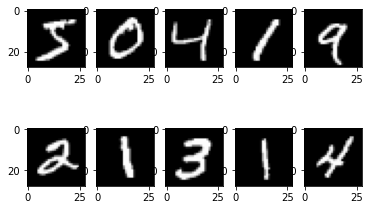

In [4]:
for i in tqdm(range(10)):
    single_image = pixel_values[i,:].reshape(28, 28)
    plt.subplot(2, 5, i+1)
    plt.imshow(single_image, cmap='gray')

In [5]:
tsne = manifold.TSNE(n_components=3, random_state=7)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=['x', 'y', 'z', 'targets']
)

tsne_df.loc[:, 'targets'] = tsne_df.targets.astype(int)

tsne_df.loc[:, ['x','y','z']]

,x,y,z
0,-5.994649,1.966903,6.639563
1,-3.640530,15.424526,14.043599
2,2.787374,16.488026,-9.701691
3,0.232035,-19.420841,-6.204474
4,2.284785,3.070855,-6.122714
...,...,...,...
2995,-0.856960,-2.798130,-13.972989
2996,-0.329223,15.779443,12.864941
2997,-7.178485,-4.083703,-8.653338
2998,13.810740,-1.557685,0.003709


In [6]:
transformed_data

array([[-5.99464941e+00,  1.96690309e+00,  6.63956261e+00],
       [-3.64052963e+00,  1.54245262e+01,  1.40435991e+01],
       [ 2.78737378e+00,  1.64880257e+01, -9.70169067e+00],
       ...,
       [-7.17848539e+00, -4.08370304e+00, -8.65333843e+00],
       [ 1.38107395e+01, -1.55768478e+00,  3.70943546e-03],
       [-1.46747704e+01,  6.31562853e+00,  5.83252668e+00]], dtype=float32)

In [7]:
tsne_df.head()

,x,y,z,targets
0,-5.994649,1.966903,6.639563,5
1,-3.640530,15.424526,14.043599,0
2,2.787374,16.488026,-9.701691,4
3,0.232035,-19.420841,-6.204474,1
4,2.284785,3.070855,-6.122714,9


/Users/hattoritatsuya/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


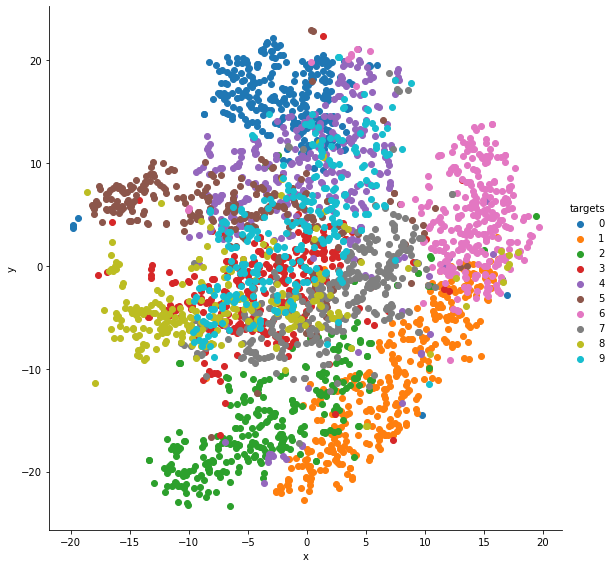

In [8]:
grid = sns.FacetGrid(tsne_df, hue='targets', size=8)
grid.map(plt.scatter, 'x', 'y').add_legend()

In [9]:
import plotly.offline as po
import plotly.graph_objs as go
po.init_notebook_mode(connected=True)

In [10]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(tsne_df, x='x', y='y', z='z',
              color='targets')
fig.show()

In [11]:
tsne = manifold.TSNE(n_components=2, random_state=7)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [12]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=['x', 'y', 'targets']
)

tsne_df.loc[:, 'targets'] = tsne_df.targets.astype(int)

In [13]:
tsne_df.loc[:, ['x','y']]

,x,y
0,-30.133867,-4.594729
1,-26.104080,-62.797638
2,-49.679535,40.543205
3,43.026569,30.086535
4,-21.236494,39.100128
...,...,...
2995,5.254047,56.688988
2996,-29.237141,-56.336292
2997,11.991306,43.576611
2998,59.467690,-10.902975


/Users/hattoritatsuya/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



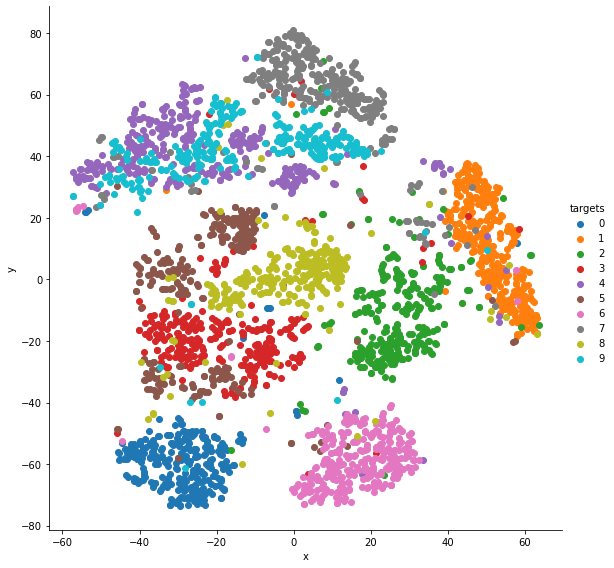

In [14]:
grid = sns.FacetGrid(tsne_df, hue='targets', size=8)
grid.map(plt.scatter, 'x', 'y').add_legend()

## kfold

In [15]:
data

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

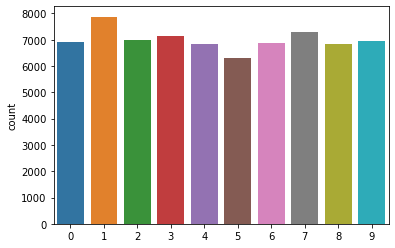

In [21]:
sns.countplot(targets)

In [22]:
pixel_values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
targets

array([5, 0, 4, ..., 4, 5, 6])

In [24]:
df = pd.read_csv('../input/train.csv')
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
pwd

'/Users/hattoritatsuya/Documents/GitHub/ml/project/mnist/notebooks'

In [27]:
# import pandas and model_selection module of scikit-learn
import pandas as pd
from sklearn import model_selection

if __name__ == '__main__':
    # Training data is in a CSV file called train.csv
    df = pd.read_csv('../input/train.csv')

    # we create a new column called kfold and fill it with -1
    df['kfold'] = -1

    # the next step is to randomize the rows of the data
    df =df.sample(frac=1).reset_index(drop=True)

    # initiate the kfold class from model_selection module
    kf = model_selection.KFold(n_splits=5)

    # fill the new kfold column
    for fold, (trn_, val_) in enumerate(kf.split(X=df)):
        df.loc[val_, 'kfold'] = fold
    
    # save the new csv with kfold column
    df.to_csv('../input/train_folds.csv', index=False)

In [28]:
!which conda

/Users/hattoritatsuya/anaconda3/bin/conda


In [29]:
!conda env list

# conda environments:
#
base                  *  /Users/hattoritatsuya/anaconda3
bioinformatics           /Users/hattoritatsuya/anaconda3/envs/bioinformatics
kaggle                   /Users/hattoritatsuya/anaconda3/envs/kaggle
ml                       /Users/hattoritatsuya/anaconda3/envs/ml
streamlit                /Users/hattoritatsuya/anaconda3/envs/streamlit

